In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 17.1 s, sys: 963 ms, total: 18 s
Wall time: 18.7 s


In [3]:
%%time 
var = "fire_climate_class"

ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0.nc")
ds_agcdv2 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_AGCDv2_1981-2010.nc")
ds_mrnbc = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_historical_19812010_mrnbc-agcd.nc")

CPU times: user 3.68 s, sys: 915 ms, total: 4.6 s
Wall time: 5.92 s


(<Figure size 670x400 with 4 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

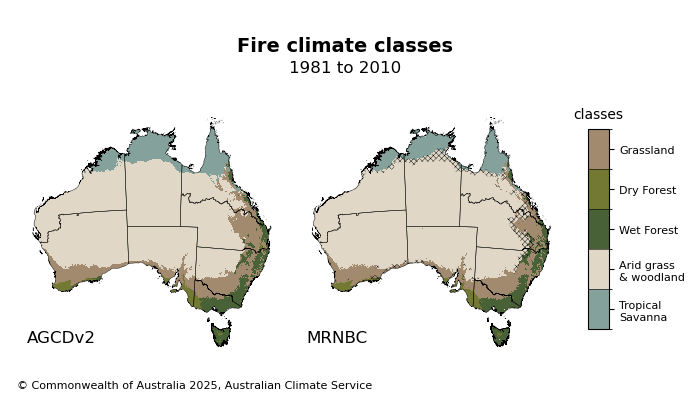

In [4]:
ds_agcdv2 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_AGCDv2_1981-2010.nc")
ds_mrnbc = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_historical_19812010_mrnbc-agcd.nc")

plot_acs_hazard_2pp(ds1=ds_agcdv2[var],
                    ds2=ds_mrnbc[var],
                    stippling2=(ds_agcdv2[var]!=ds_mrnbc[var]).coarsen(lat=2, boundary="pad").mean().coarsen(lon=2, boundary="pad").mean()>0.3,
                    regions = regions,
                    title = "Fire climate classes",
                    date_range="1981 to 2010",
                    subplot_titles=["AGCDv2", "MRNBC"],
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                    outfile="figures/Fire-climate-classes-historical-agcdv2-mrnbc.png",
                   )

(<Figure size 670x400 with 4 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

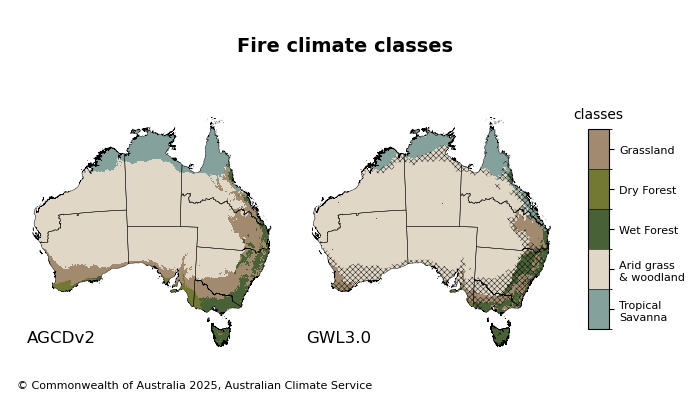

In [5]:
ds_agcdv2 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_AGCDv2_1981-2010.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0.nc")

plot_acs_hazard_2pp(ds1=ds_agcdv2[var],
                    ds2=ds_gwl30[var],
                    stippling2=(ds_agcdv2[var]!=ds_gwl30[var]).coarsen(lat=2, boundary="pad").mean().coarsen(lon=2, boundary="pad").mean()>0.3,
                    regions = regions,
                    title = "Fire climate classes",
                    # date_range="1981 to 2010",
                    subplot_titles=["AGCDv2", "GWL3.0"],
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                    outfile="figures/Fire-climate-classes-agcdv2-to-gwl30.png",
                   )

(<Figure size 670x400 with 4 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

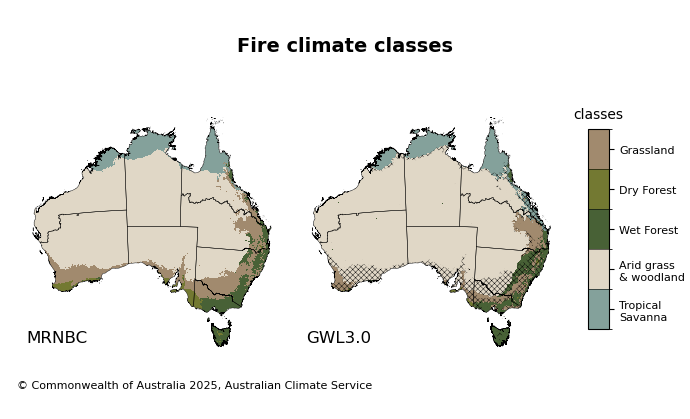

In [6]:
ds_mrnbc = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_historical_19812010_mrnbc-agcd.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0.nc")


plot_acs_hazard_2pp(ds1=ds_mrnbc[var],
                    ds2=ds_gwl30[var],
                    stippling2=(ds_mrnbc[var]!=ds_gwl30[var]).coarsen(lat=2, boundary="pad").mean().coarsen(lon=2, boundary="pad").mean()>0.3,
                    regions = regions,
                    title = "Fire climate classes",
                    # date_range="1981 to 2010",
                    subplot_titles=["MRNBC", "GWL3.0"],
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                    outfile="figures/Fire-climate-classes-mrnbc-to-gwl30.png",
                   )

CPU times: user 6.68 s, sys: 75.2 ms, total: 6.76 s
Wall time: 7.13 s


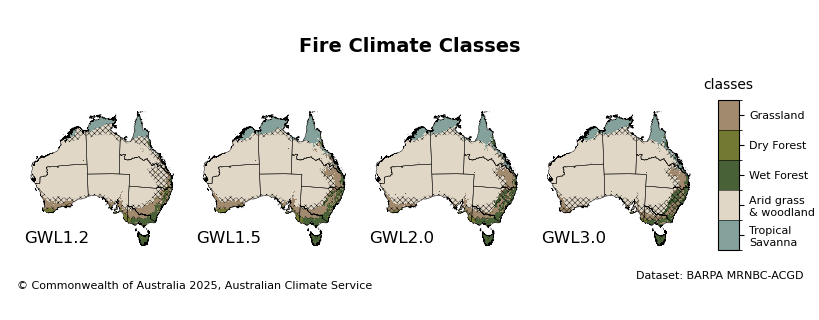

In [7]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL1.2_mrnbc-agcd.nc")
ds_gwl15 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL1.5_mrnbc-agcd.nc")
ds_gwl20 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL2.0_mrnbc-agcd.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0_mrnbc-agcd.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges

coarsen_factor = 2

# define the "truth"
truth = ds_agcdv2[var]

stippling_gwl12 = (truth != ds_gwl12[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3
stippling_gwl15 = (truth != ds_gwl15[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3
stippling_gwl20 = (truth != ds_gwl20[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3
stippling_gwl30 = (truth != ds_gwl30[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl12=stippling_gwl12,
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire Climate Classes",
                    # figsize=(7,2),
                    # baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "BARPA MRNBC-ACGD",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                    );



CPU times: user 14.1 s, sys: 68.4 ms, total: 14.2 s
Wall time: 14.2 s


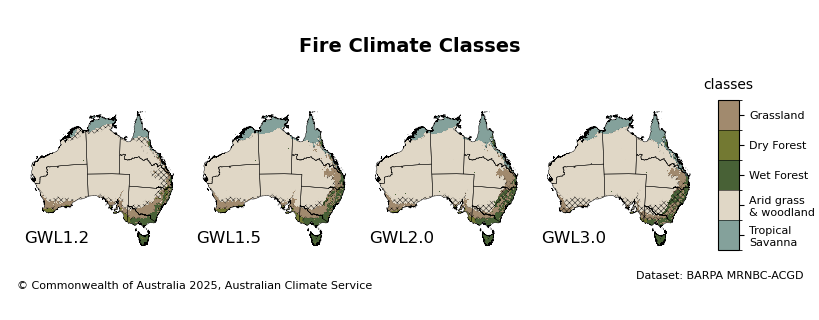

In [8]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL1.2_mrnbc-agcd.nc")
ds_gwl15 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL1.5_mrnbc-agcd.nc")
ds_gwl20 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL2.0_mrnbc-agcd.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0_mrnbc-agcd.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges

coarsen_factor = 2

# define the "truth"
truth = ds_mrnbc[var]

stippling_gwl12 = (truth != ds_gwl12[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3
stippling_gwl15 = (truth != ds_gwl15[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3
stippling_gwl20 = (truth != ds_gwl20[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3
stippling_gwl30 = (truth != ds_gwl30[var])\
.coarsen(lat=coarsen_factor, boundary="pad").mean().coarsen(lon=coarsen_factor, boundary="pad").mean()>0.3


plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl12=stippling_gwl12,
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire Climate Classes",
                    # figsize=(7,2),
                    # baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "BARPA MRNBC-ACGD",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                    );



CPU times: user 6.4 s, sys: 65.9 ms, total: 6.47 s
Wall time: 6.54 s


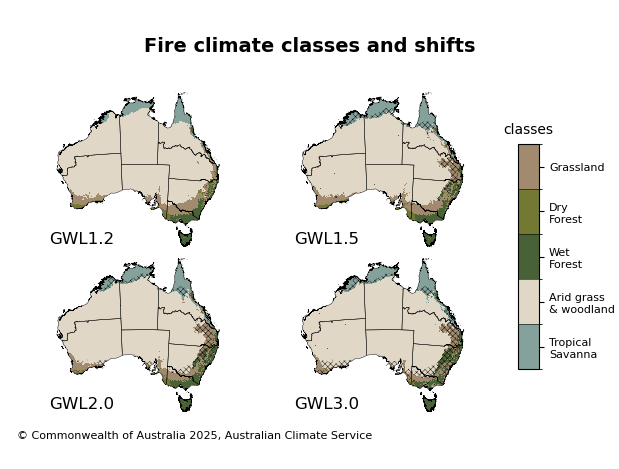

In [9]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and shifts",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n& woodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    orientation="square",
                    tick_rotation=0,
                    );

CPU times: user 6.66 s, sys: 75.6 ms, total: 6.73 s
Wall time: 6.78 s


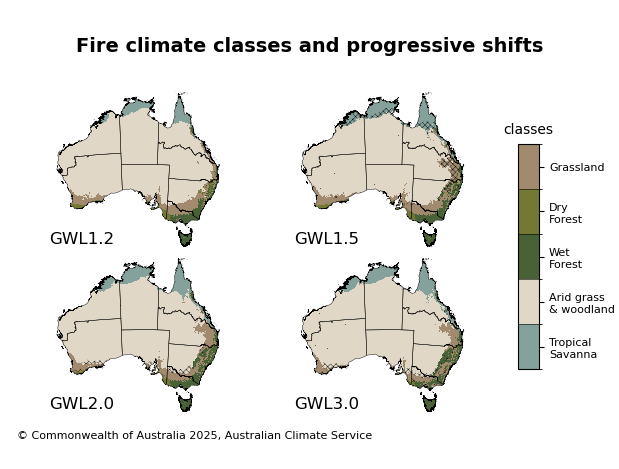

In [10]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and progressive shifts",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n& woodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    orientation="square",
                    tick_rotation=0,
                    );